<a href="https://colab.research.google.com/github/tinkam17/Stock-prediction-model/blob/main/IPL_PROBABLITY_PRIDICTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IPL** **PROBABLITY** **PRIDICTOR**

In [18]:
import numpy as np
import pandas as pd

In [19]:
match = pd.read_csv('/content/matches.csv')
delivery = pd.read_csv('/content/deliveries.csv')

In [20]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [21]:
match.shape

(756, 18)

In [22]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [23]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

<ipython-input-23-40e5f6bc616a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [24]:
total_score_df

,match_id,inning,total_runs
0,1,1,207.0
1,1,2,172.0
2,2,1,184.0
3,2,2,187.0
4,3,1,183.0
...,...,...,...
966,478,2,114.0
967,479,1,168.0
968,479,2,170.0
969,480,1,152.0


In [25]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [26]:
total_score_df

,match_id,inning,total_runs
0,1,1,207.0
2,2,1,184.0
4,3,1,183.0
6,4,1,163.0
8,5,1,157.0
...,...,...,...
959,476,1,152.0
963,477,1,172.0
965,478,1,148.0
967,479,1,168.0


In [27]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [28]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,IPL-2014,Abu Dhabi,29-04-2014,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN,476,152.0
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN,477,172.0
477,478,IPL-2014,Ranchi,02-05-2014,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Chennai Super Kings,34,0,RA Jadeja,JSCA International Stadium Complex,AK Chaudhary,NJ Llong,NaN,478,148.0
478,479,IPL-2014,Mumbai,03-05-2014,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Mumbai Indians,0,5,CJ Anderson,Wankhede Stadium,BNJ Oxenford,C Shamshuddin,NaN,479,168.0


In [29]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [30]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [31]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [32]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [33]:
match_df.shape

(393, 20)

In [34]:
match_df = match_df[match_df['dl_applied'] == 0]

In [35]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178.0
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148.0
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,IPL-2014,Abu Dhabi,29-04-2014,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN,476,152.0
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN,477,172.0
477,478,IPL-2014,Ranchi,02-05-2014,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Chennai Super Kings,34,0,RA Jadeja,JSCA International Stadium Complex,AK Chaudhary,NJ Llong,NaN,478,148.0
478,479,IPL-2014,Mumbai,03-05-2014,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Mumbai Indians,0,5,CJ Anderson,Wankhede Stadium,BNJ Oxenford,C Shamshuddin,NaN,479,168.0


In [36]:
match_df = match_df[['match_id','city','winner','total_runs']]


In [37]:
delivery_df = match_df.merge(delivery,on='match_id')

In [38]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [39]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91939,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,4.0,KK Nair,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
91940,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,5.0,KK Nair,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
91941,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,6.0,SV Samson,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
91942,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,7.0,SV Samson,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN


In [40]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

<ipython-input-40-cafdf4636499>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [41]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [42]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [43]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,206.0,119.0
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0,118.0
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0,117.0
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0,204.0,116.0
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0,200.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91939,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,4.0,KK Nair,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,22.0,130.0,98.0
91940,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,5.0,KK Nair,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,23.0,129.0,97.0
91941,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,6.0,SV Samson,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,23.0,129.0,96.0
91942,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,7.0,SV Samson,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,27.0,125.0,95.0


In [44]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

<ipython-input-44-5cbb94c1e6d2>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,1.0,0.0,1.0,0,NaN,NaN,1.0,206.0,119.0,10
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,118.0,10
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,117.0,10
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,2.0,0.0,2.0,0,NaN,NaN,3.0,204.0,116.0,10
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,4.0,0.0,4.0,0,NaN,NaN,7.0,200.0,115.0,10


In [45]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,1.0,0.0,1.0,0,NaN,NaN,1.0,206.0,119.0,10
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,118.0,10
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,117.0,10
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,2.0,0.0,2.0,0,NaN,NaN,3.0,204.0,116.0,10
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,4.0,0.0,4.0,0,NaN,NaN,7.0,200.0,115.0,10


In [46]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [47]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [48]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [49]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [50]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]


In [51]:
final_df = final_df.sample(final_df.shape[0])

In [52]:
final_df.sample()


,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
11259,Kings XI Punjab,Deccan Chargers,Hyderabad,59.0,47.0,7,164.0,8.630137,7.531915,1


In [53]:
final_df.dropna(inplace=True)

In [54]:
final_df = final_df[final_df['balls_left'] != 0]

In [55]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [56]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
76143,Mumbai Indians,Rajasthan Royals,Jaipur,140.0,64.0,6,179.0,4.178571,13.125000
43501,Deccan Chargers,Chennai Super Kings,Nagpur,64.0,47.0,7,138.0,6.082192,8.170213
4609,Mumbai Indians,Royal Challengers Bangalore,Mumbai,101.0,76.0,9,162.0,8.318182,7.973684
51024,Rajasthan Royals,Kings XI Punjab,Chandigarh,182.0,106.0,9,195.0,5.571429,10.301887
91505,Kolkata Knight Riders,Chennai Super Kings,Ranchi,83.0,65.0,6,148.0,7.090909,7.661538
...,...,...,...,...,...,...,...,...,...
9374,Mumbai Indians,Kings XI Punjab,Chandigarh,88.0,42.0,5,182.0,7.230769,12.571429
85980,Rajasthan Royals,Sunrisers Hyderabad,Delhi,117.0,107.0,9,132.0,6.923077,6.560748
62974,Royal Challengers Bangalore,Kings XI Punjab,Chandigarh,124.0,79.0,7,163.0,5.707317,9.417722
43246,Kings XI Punjab,Mumbai Indians,Chandigarh,66.0,58.0,8,154.0,8.516129,6.827586


In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [59]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])


In [60]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [61]:
y_pred = pipe.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.8197513812154696

In [64]:
pipe.predict_proba(X_test)[10]

array([0.64275144, 0.35724856])

In [65]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [66]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [67]:
temp_df,target = match_progression(delivery_df, 74,pipe)
temp_df

Target- 178.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4.0,0,71.1,28.9
10467,2,8.0,0,65.1,34.9
10473,3,1.0,0,72.4,27.6
10479,4,7.0,1,80.7,19.3
10485,5,12.0,0,71.5,28.5
10491,6,13.0,0,58.7,41.3
10497,7,9.0,0,52.2,47.8
10505,8,15.0,0,35.3,64.7
10511,9,7.0,0,32.8,67.2
10518,10,17.0,0,17.6,82.4


Text(0.5, 1.0, 'Target-178.0')

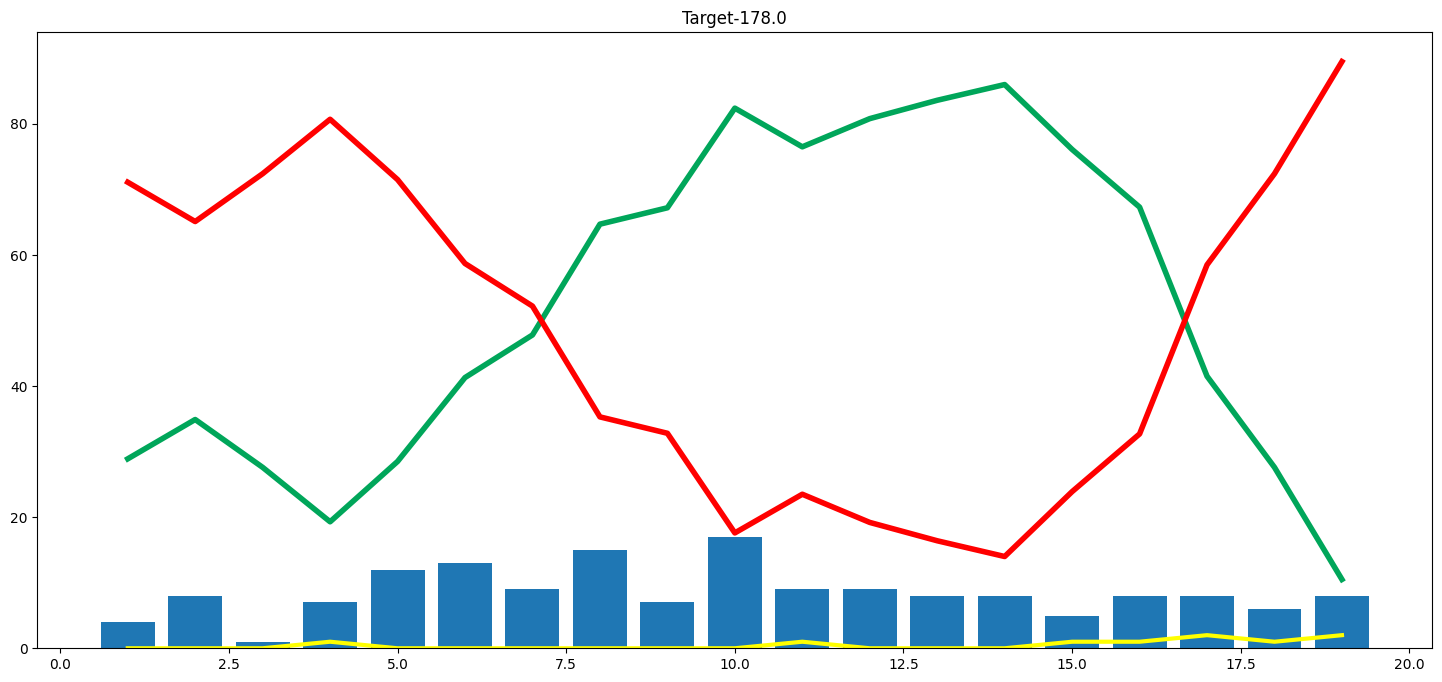

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [72]:
temp_df,target = match_progression(delivery_df,83,pipe)
temp_df

Target- 109.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
12642,1,0.0,0,1.1,98.9
12648,2,6.0,0,0.9,99.1
12654,3,8.0,0,0.7,99.3
12660,4,10.0,0,0.5,99.5
12666,5,10.0,0,0.3,99.7
12672,6,10.0,0,0.2,99.8
12678,7,4.0,0,0.2,99.8
12688,8,18.0,0,0.1,99.9
12695,9,8.0,0,0.1,99.9
12701,10,4.0,0,0.1,99.9


Text(0.5, 1.0, 'Target-109.0')

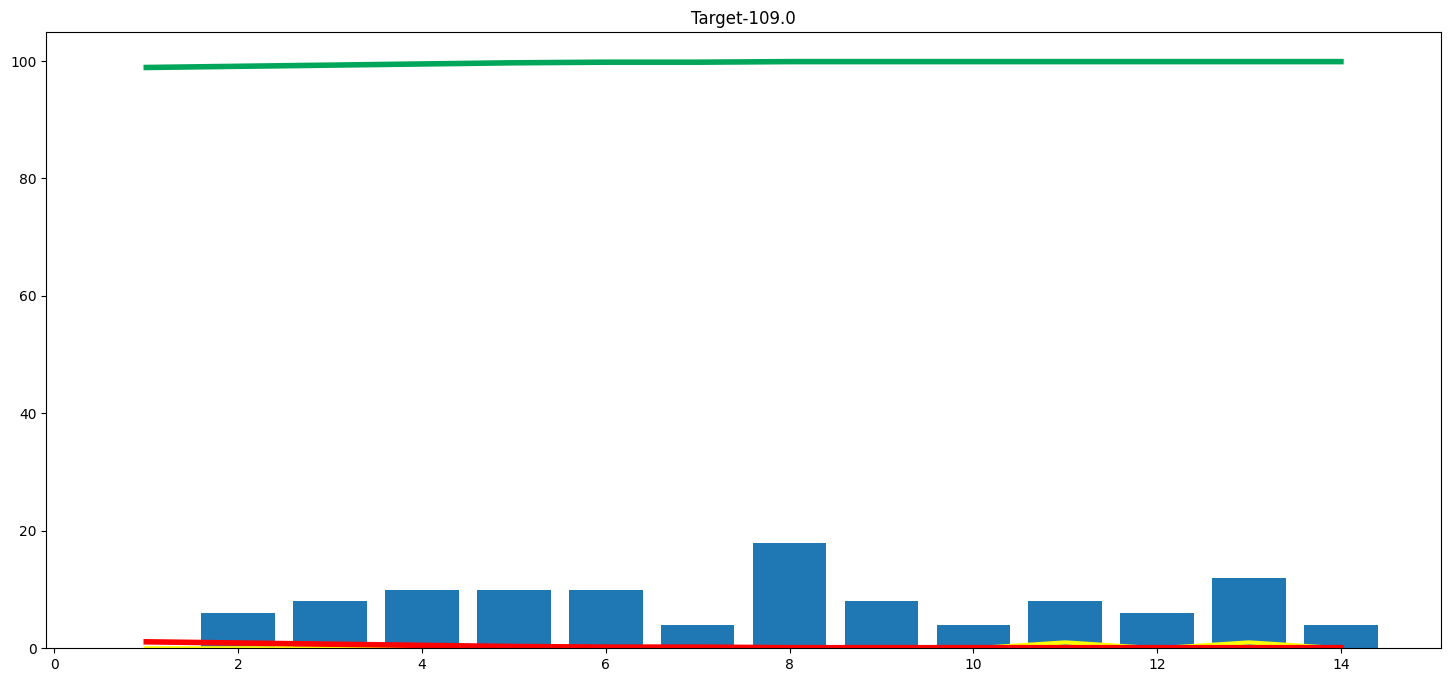

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [74]:
temp_df,target = match_progression(delivery_df,88,pipe)
temp_df

Target- 129.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
13760,1,4.0,0,9.3,90.7
13766,2,5.0,0,9.1,90.9
13772,3,8.0,0,7.3,92.7
13779,4,2.0,1,15.7,84.3
13785,5,13.0,1,16.0,84.0
13792,6,3.0,0,18.2,81.8
13798,7,3.0,0,20.6,79.4
13804,8,3.0,0,23.2,76.8
13810,9,10.0,0,17.5,82.5
13816,10,2.0,1,33.1,66.9


Text(0.5, 1.0, 'Target-129.0')

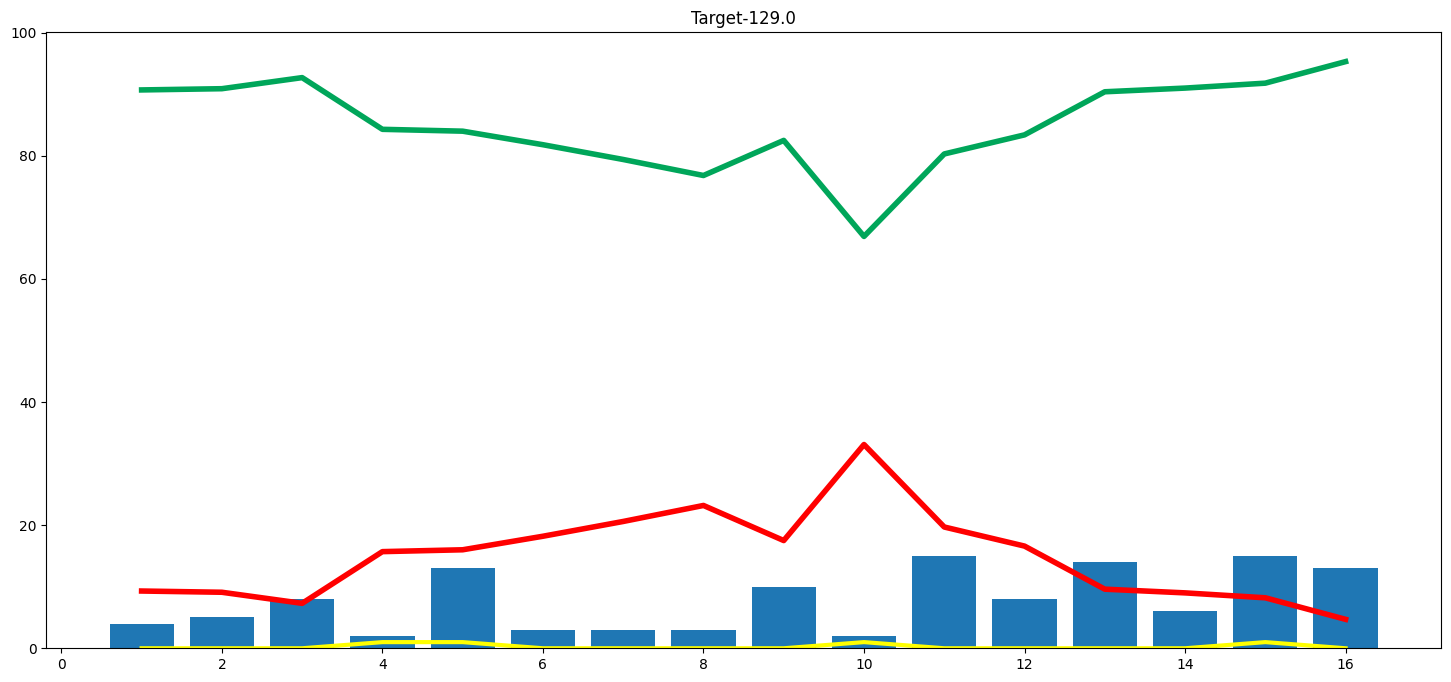

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [69]:
teams


['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [70]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan], dtype=object)

In [71]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))